In [ ]:
# HYPOTHESIS TESTING

In [ ]:
# Hypothesis 3:
# A male author is more productive than a female author.

In [1]:
# >>> Preparation
# Import categorized 'names_cat.csv'
import pandas

print("Importing names... ")
names = pandas.read_csv("data/names_cat_i2.csv", usecols=["name", "n_publs", "likely_gender", "score"])

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
names = names.set_index("name", drop = False)
print("Names imported. They look like this: {}".format(names[:5]))

Importing names... 
Names imported. They look like this:                                         name likely_gender  n_publs  score
name                                                                      
'Maseka Lesaoana            'Maseka Lesaoana        female        2      8
(David) Jing Dai            (David) Jing Dai          male        1      7
(Max) Zong-Ming Cheng  (Max) Zong-Ming Cheng          male        2      8
(Sophy) Shu-Jiun Chen  (Sophy) Shu-Jiun Chen        female        2      7
(Zhou) Bryan Bai            (Zhou) Bryan Bai          male        2      6


In [2]:
print("Importing publications... ")
cols = [
    'key', 
    'pub_cat',
    'pub_type',
    'title',
    'year',
    'authors',
    'n_authors',
    'n_males',
    'n_females',
    'n_unknown',
    'ratio',
    'n_contribs_females',
    'n_contribs_males',
    'n_contribs_unknown'
]

publs = pandas.read_csv("data/publications_cor3.csv", usecols=cols)

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
publs = publs.set_index("key", drop = False)
print("Publications imported. They look like this: {}".format(publs[:5]))

Importing publications... 


C:\Program_Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Publications imported. They look like this:                                                                  key  \
key                                                                    
books/acm/0082477                                  books/acm/0082477   
books/acm/Kim95                                      books/acm/Kim95   
books/acm/kim95/AnnevelinkACFHK95  books/acm/kim95/AnnevelinkACFHK95   
books/acm/kim95/Blakeley95                books/acm/kim95/Blakeley95   
books/acm/kim95/BreitbartGS95          books/acm/kim95/BreitbartGS95   

                                        pub_cat pub_type  \
key                                                        
books/acm/0082477                          book      NaN   
books/acm/Kim95                            book      NaN   
books/acm/kim95/AnnevelinkACFHK95  incollection      NaN   
books/acm/kim95/Blakeley95         incollection      NaN   
books/acm/kim95/BreitbartGS95      incollection      NaN   

                              

In [ ]:
# >>> Testing
# A male author is more productive than a female author.

In [3]:
# Relative values
# Publications Contributed to
# Finding the mode of a series: https://stackoverflow.com/questions/10797819/finding-the-mode-of-a-list
from statistics import mode

names_max = names[names['score'] >= 5]

# Maximum values
n_publs_mean = names_max['n_publs'].mean() # Overall mean of amount of publications
n_publs_median = names_max['n_publs'].median() # Overall median of amount of authors
n_publs_mode = mode(names_max['n_publs']) # Overall median of amount of authors

n_publs_mean_by_gender = names_max.groupby("likely_gender").agg({'n_publs':'mean'}) # Mean by gender
n_publs_median_by_gender = names_max.groupby("likely_gender").agg({'n_publs':'median'}) # Median by gender
n_publs_mode_by_gender = names_max.groupby("likely_gender").agg({'n_publs': mode}) # Mode by gender

n_publs_f_mean = n_publs_mean_by_gender.at["female", "n_publs"] # mean for female authors
n_publs_m_mean = n_publs_mean_by_gender.at["male", "n_publs"] # mean for male authors

n_publs_f_median = n_publs_median_by_gender.at["female", "n_publs"] # median for female authors
n_publs_m_median = n_publs_median_by_gender.at["male", "n_publs"] # median for male authors

n_publs_f_mode = n_publs_mode_by_gender.at["female", "n_publs"] # mode for female authors
n_publs_m_mode = n_publs_mode_by_gender.at["male", "n_publs"] # mode for male authors

names_u = names[names['score'] < 5]
n_publs_u_mean = names_u['n_publs'].mean() # Overall mean of amount of publications
n_publs_u_median = names_u['n_publs'].median() # Overall median of amount of authors
n_publs_u_mode = mode(names_u['n_publs']) # Overall median of amount of authors

print("On average, an author contributes to: mean={}, median={} and mode={} publications".format(n_publs_mean, n_publs_median, n_publs_mode))
print("On average, an author of unknown gender contributes to: mean={}, median={} and mode={} publications".format(n_publs_u_mean, n_publs_u_median, n_publs_u_mode))
print("On average, a female author contributes to: mean={}, median={} and mode={} publications".format(n_publs_f_mean, n_publs_f_median, n_publs_f_mode))
print("On average, a male author contributes to: mean={}, median={} and mode={} publications".format(n_publs_m_mean, n_publs_m_median, n_publs_m_mode))
print("On average, a male author contributes to {} times more publications than a female author".format(n_publs_m_mean/n_publs_f_mean))
'''
On average, an author contributes to: mean=6.139819233233704, median=2.0 and mode=1 publications
On average, an author of unknown gender contributes to: mean=5.371090264478818, median=1.0 and mode=1 publications
On average, a female author contributes to: mean=4.113843465235301, median=1 and mode=1 publications
On average, a male author contributes to: mean=6.402508908684967, median=2 and mode=1 publications
On average, a male author contributes to 1.5563326516408327 times more publications
'''

On average, an author contributes to: mean=6.139819233233704, median=2.0 and mode=1 publications
On average, an author of unknown gender contributes to: mean=5.371090264478818, median=1.0 and mode=1 publications
On average, a female author contributes to: mean=4.113843465235301, median=1 and mode=1 publications
On average, a male author contributes to: mean=6.402508908684967, median=2 and mode=1 publications
On average, a male author contributes to 1.5563326516408327 times more publications than a female author


'\nOn average, an author contributes to: mean=6.139819233233704, median=2.0 and mode=1 publications\nOn average, an author of unknown gender contributes to: mean=5.371090264478818, median=1.0 and mode=1 publications\nOn average, a female author contributes to: mean=4.113843465235301, median=1 and mode=1 publications\nOn average, a male author contributes to: mean=6.402508908684967, median=2 and mode=1 publications\nOn average, a male author contributes to 1.5563326516408327 times more publications\n'

In [4]:
import numpy as np

f = publs['n_contribs_females'].values
m = publs['n_contribs_males'].values
u = publs['n_contribs_unknown'].values
# appending numpy arrays: https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html
total_contribs = np.append(f, m) 
total_contribs = np.append(total_contribs, u)

In [5]:
# Relative values
# Single Contributions

n_contribs_mean = total_contribs.mean()
n_contribs_median = np.median(total_contribs) # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.median.html
n_contribs_mode = mode(total_contribs)

n_contribs_f_mean = publs['n_contribs_females'].mean() # mean for female authors
n_contribs_m_mean = publs['n_contribs_males'].mean() # mean for male authors
n_contribs_u_mean = publs['n_contribs_unknown'].mean() # mean for unknown authors

n_contribs_f_median = publs['n_contribs_females'].median() # median for female authors
n_contribs_m_median = publs['n_contribs_males'].median() # median for male authors
n_contribs_u_median = publs['n_contribs_unknown'].median() # median for male authors

n_contribs_f_mode = mode(publs['n_contribs_females']) # mode for female authors
n_contribs_m_mode = mode(publs['n_contribs_males']) # mode for male authors
n_contribs_u_mode = mode(publs['n_contribs_unknown']) # mode for male authors

print("On average, an author of unknown gender makes: mean={}, median={} and mode={} contributions".format(n_contribs_u_mean, n_contribs_u_median, n_contribs_u_mode))
print("On average, a female author makes: mean={}, median={} and mode={} contributions".format(n_contribs_f_mean, n_contribs_f_median, n_contribs_f_mode))
print("On average, a male author makes: mean={}, median={} and mode={} contributions".format(n_contribs_m_mean, n_contribs_m_median, n_contribs_m_mode))
print("On average, a male author makes {} times more publications than a female author".format(n_contribs_m_mean/n_contribs_f_mean))

On average, an author of unknown gender makes: mean=0.3931566384426614, median=0.3333333333333333 and mode=0.0 contributions
On average, a female author makes: mean=0.04392178158092118, median=0.0 and mode=0.0 contributions
On average, a male author makes: mean=0.5480355172855784, median=0.5 and mode=1.0 contributions
On average, a male author makes 12.477533869519425 times more publications than a female author


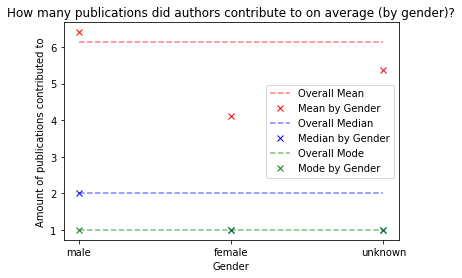

In [11]:
# >>> Visualization
# With unknown gender
import matplotlib.pyplot as plt
plt_mean = plt.plot(['male', 'female', 'unknown'], [n_publs_mean, n_publs_mean, n_publs_mean], 'r--', alpha=0.5, label='Overall Mean')
plt_g_mean = plt.plot(['male','female', 'unknown'], [n_publs_m_mean, n_publs_f_mean, n_publs_u_mean], 'rx', label='Mean by Gender')

plt_median = plt.plot(['male', 'female', 'unknown'],[n_publs_median, n_publs_median, n_publs_median], 'b--', alpha=0.5, label='Overall Median')
plt_g_median = plt.plot(['male', 'female', 'unknown'],[n_publs_m_median, n_publs_f_median, n_publs_u_median], 'bx', label='Median by Gender')

plt_mode = plt.plot(['male', 'female', 'unknown'],[n_publs_mode, n_publs_mode, n_publs_mode], 'g--', alpha=0.5, label='Overall Mode')
plt_g_mode = plt.plot(['male', 'female', 'unknown'],[n_publs_m_mode, n_publs_f_mode, n_publs_u_mode], 'gx', label='Mode by Gender')


plt.xlabel('Gender')
plt.ylabel('Amount of publications contributed to')

plt.title("How many publications did authors contribute to on average (by gender)?")

plt.legend(loc="best")
plt.show()

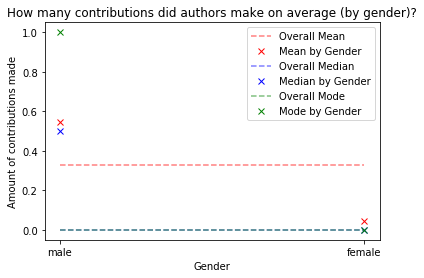

In [8]:
# Single Contributions
plt_mean = plt.plot(['male', 'female'], [n_contribs_mean, n_contribs_mean], 'r--', alpha=0.5, label='Overall Mean')
plt_g_mean = plt.plot(['male','female'], [n_contribs_m_mean, n_contribs_f_mean], 'rx', label='Mean by Gender')

plt_median = plt.plot(['male', 'female'],[n_contribs_median, n_contribs_median], 'b--', alpha=0.5, label='Overall Median')
plt_g_median = plt.plot(['male', 'female'],[n_contribs_m_median, n_contribs_f_median], 'bx', label='Median by Gender')

plt_mode = plt.plot(['male', 'female'],[n_contribs_mode, n_contribs_mode], 'g--', alpha=0.5, label='Overall Mode')
plt_g_mode = plt.plot(['male', 'female'],[n_contribs_m_mode, n_contribs_f_mode], 'gx', label='Mode by Gender')


plt.xlabel('Gender')
plt.ylabel('Amount of contributions made')

plt.title("How many contributions did authors make on average (by gender)?")

plt.legend(loc="best")
plt.show()

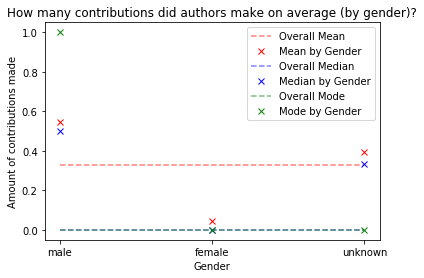

In [9]:
# With unknowns
plt_mean = plt.plot(['male', 'female', 'unknown'], [n_contribs_mean, n_contribs_mean, n_contribs_mean], 'r--', alpha=0.5, label='Overall Mean')
plt_g_mean = plt.plot(['male','female', 'unknown'], [n_contribs_m_mean, n_contribs_f_mean, n_contribs_u_mean], 'rx', label='Mean by Gender')

plt_median = plt.plot(['male', 'female', 'unknown'],[n_contribs_median, n_contribs_median, n_contribs_median], 'b--', alpha=0.5, label='Overall Median')
plt_g_median = plt.plot(['male', 'female', 'unknown'],[n_contribs_m_median, n_contribs_f_median, n_contribs_u_median], 'bx', label='Median by Gender')

plt_mode = plt.plot(['male', 'female', 'unknown'],[n_contribs_mode, n_contribs_mode, n_contribs_mode], 'g--', alpha=0.5, label='Overall Mode')
plt_g_mode = plt.plot(['male', 'female', 'unknown'],[n_contribs_m_mode, n_contribs_f_mode, n_contribs_u_mode], 'gx', label='Mode by Gender')


plt.xlabel('Gender')
plt.ylabel('Amount of contributions made')

plt.title("How many contributions did authors make on average (by gender)?")

plt.legend(loc="best")
plt.show()

In [ ]:
# >>> Evaluation
# Hypothesis 3 is correct. A male author is more productive than a female author.